Insurance

In [1]:
#IMPORT DEPENDENCIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
#Loading and Inspecting Data

In [4]:
insurance_dataset = pd.read_csv('new.csv')

In [5]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
insurance_dataset.shape

(955, 7)

In [7]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955 entries, 0 to 954
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       955 non-null    int64  
 1   sex       955 non-null    object 
 2   bmi       955 non-null    float64
 3   children  955 non-null    int64  
 4   smoker    955 non-null    object 
 5   region    955 non-null    object 
 6   charges   955 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 52.4+ KB


In [8]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
insurance_dataset.describe()

,age,bmi,children,charges
count,955.000000,955.000000,955.000000,955.000000
mean,39.723560,30.919309,1.064921,13153.230304
std,14.260052,6.043831,1.190447,12076.031991
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.610000,0.000000,4719.630300
50%,40.000000,30.685000,1.000000,9361.326800
75%,52.000000,35.125000,2.000000,15944.891875
max,64.000000,50.380000,5.000000,63770.428010


In [10]:
#Data Visualization

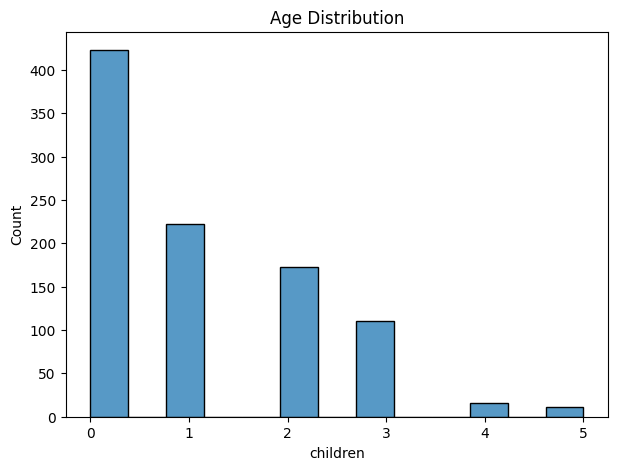

In [11]:
#HISTOGRAM - AGE DISTRIBUTION
plt.figure(figsize=(7,5))
sns.histplot(insurance_dataset['children'])
plt.title('Age Distribution')
plt.show()

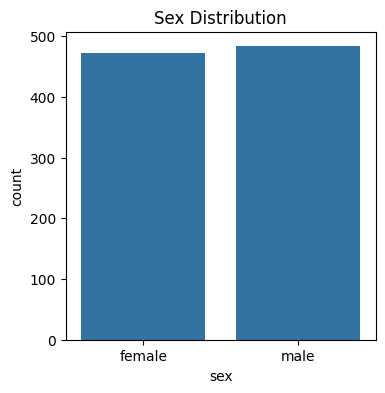

In [12]:
#COUNTPLOT - SEX DISTRIBUTION
plt.figure(figsize=(4,4))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [13]:
insurance_dataset['sex'].value_counts()

sex
male      483
female    472
Name: count, dtype: int64

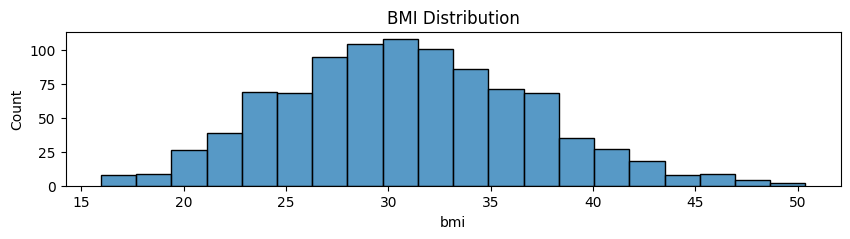

In [14]:
#HISTOGRAM - BMI DISTRIBUTION
plt.figure(figsize=(10,2))
sns.histplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

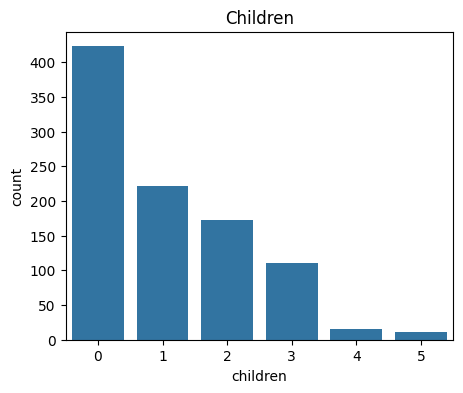

In [15]:
#COUNTPLOT - CHILDREN
plt.figure(figsize=(5,4))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Children')
plt.show()

In [16]:
insurance_dataset['children'].value_counts()

children
0    423
1    222
2    173
3    110
4     16
5     11
Name: count, dtype: int64

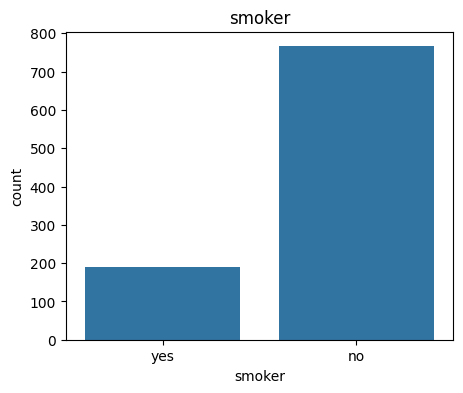

In [17]:
#COUNTPLOT - SMOKER & NON-SMOKER
plt.figure(figsize=(5,4))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('smoker')
plt.show()

In [18]:
insurance_dataset['smoker'].value_counts()

smoker
no     766
yes    189
Name: count, dtype: int64

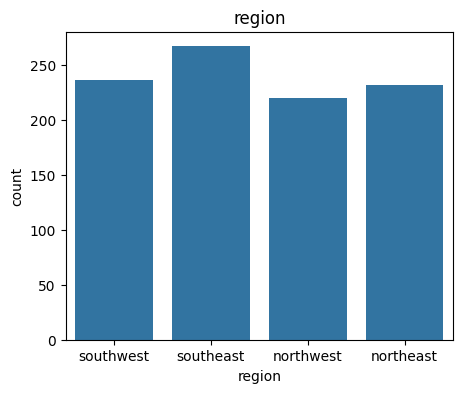

In [19]:
#COUNTPLOT - REGION
plt.figure(figsize=(5,4))
sns.countplot(x='region', data=insurance_dataset)
plt.title('region')
plt.show()

In [20]:
insurance_dataset['region'].value_counts()

region
southeast    267
southwest    236
northeast    232
northwest    220
Name: count, dtype: int64

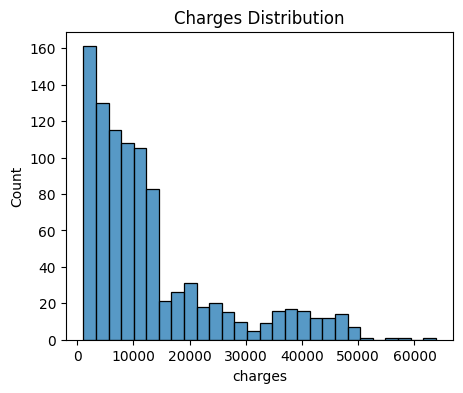

In [21]:
#HISTOGRAM - CHARGES DISTRIBUTION
plt.figure(figsize=(5,4))
sns.histplot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

In [22]:
#DATA PREPROCESSING

In [23]:
# Perform the replacement
insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)
insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

# Explicitly manage data types (if needed)
insurance_dataset = insurance_dataset.infer_objects()

C:\Users\mdabd\AppData\Local\Temp\ipykernel_6404\1665444914.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)
C:\Users\mdabd\AppData\Local\Temp\ipykernel_6404\1665444914.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)
C:\Users\mdabd\AppData\Local\Temp\ipykernel_6404\1665444914.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To

In [24]:
#SPLITTING DATA & BUILDING MODEL

In [25]:
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']

In [26]:
print(X)

     age  sex     bmi  children  smoker  region
0     19    1  27.900         0       0       1
1     18    0  33.770         1       1       0
2     28    0  33.000         3       1       0
3     33    0  22.705         0       1       3
4     32    0  28.880         0       1       3
..   ...  ...     ...       ...     ...     ...
950   57    0  18.335         0       1       2
951   51    0  42.900         2       0       0
952   30    1  28.405         1       1       3
953   44    0  30.200         2       0       1
954   34    0  27.835         1       0       3

[955 rows x 6 columns]


In [27]:
print(Y)

0      16884.92400
1       1725.55230
2       4449.46200
3      21984.47061
4       3866.85520
          ...     
950    11534.87265
951    47462.89400
952     4527.18295
953    38998.54600
954    20009.63365
Name: charges, Length: 955, dtype: float64


In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [29]:
print(X.shape, X_train.shape, X_test.shape)

(955, 6) (764, 6) (191, 6)


In [30]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [31]:
#MODEL EVALUATION

In [32]:
training_data_prediction =regressor.predict(X_train)

In [33]:
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared value: ', r2_train)

R squared value:  0.764714372498428


In [34]:
test_data_prediction =regressor.predict(X_test)

In [35]:
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared value: ', r2_test)

R squared value:  0.753010558664948


In [36]:
#SAVING THE MODEL

In [37]:
import joblib
joblib.dump(regressor, 'insurance_model.pkl') # save the model

['insurance_model.pkl']

In [38]:
#MAKING PREDICTIONS WITH THE MODEL

In [43]:
import pandas as pd

# Assuming these are your feature names based on the training data
feature_names = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']

# Define the input data
# Example: [age, sex, bmi, children, smoker, region]
input_data = [28, 1, 26.2, 2, 0, 2]  # Replace with actual input values

# Convert the input data to a DataFrame with the appropriate feature names
input_data_df = pd.DataFrame([input_data], columns=feature_names)

# Assuming regressor is your trained model
prediction = regressor.predict(input_data_df)

# For demonstration purposes, we'll print input_data_df
print(input_data_df)

# To make the prediction, uncomment the following lines if regressor is defined:
print('The insurance cost is USD', prediction[0])

   age  sex   bmi  children  smoker  region
0   28    1  26.2         2       0       2
The insurance cost is USD 28695.7796674164
